In [7]:
# your code here!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

X_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_cat = df.select_dtypes(include=['object']).columns.tolist()
scaler = preprocessing.StandardScaler().fit(df[X_num])
X_num_scaled = scaler.transform(df[X_num])
print(f"mean: {X_num_scaled.mean(axis=0)} std: {X_num_scaled.std(axis=0)}\n")

min_max_scaler = preprocessing.MinMaxScaler()
X_num_scaled = min_max_scaler.fit_transform(df[X_num])
print(f"MinMaxScaler: {X_num_scaled}\n")

max_abs_scaler = preprocessing.MaxAbsScaler()
X_num_scaled = max_abs_scaler.fit_transform(df[X_num])
print(f"MaxAbsScaler: {X_num_scaled}\n")

X_num_normalized = preprocessing.normalize(df[X_num], norm='l2')
print(f"Norm: {X_num_normalized}\n")

# Encode the categorical features
encoder = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X_cat_encoded = encoder.fit_transform(df[X_cat])
print(f"Encoded: {X_cat_encoded}")

mean: [-4.84254598e-17 -2.42127299e-17 -6.40628478e-17] std: [1. 1. 1.]

MinMaxScaler: [[0.         0.01388889 0.11542289]
 [0.         0.47222222 0.38507463]
 [0.         0.02777778 0.35422886]
 ...
 [0.         0.15277778 0.11293532]
 [1.         0.05555556 0.55870647]
 [0.         0.91666667 0.86965174]]

MaxAbsScaler: [[0.         0.01388889 0.25136842]
 [0.         0.47222222 0.47957895]
 [0.         0.02777778 0.45347368]
 ...
 [0.         0.15277778 0.24926316]
 [1.         0.05555556 0.62652632]
 [0.         0.91666667 0.88968421]]

Norm: [[0.         0.03348205 0.99943932]
 [0.         0.51260992 0.85862161]
 [0.         0.03711462 0.99931102]
 ...
 [0.         0.34834554 0.93736619]
 [0.01342027 0.05368107 0.99846795]
 [0.         0.52981853 0.84811103]]

Encoded: [[5.375e+03 0.000e+00 1.000e+00 ... 2.000e+00 2.505e+03 0.000e+00]
 [3.962e+03 1.000e+00 0.000e+00 ... 3.000e+00 1.466e+03 0.000e+00]
 [2.564e+03 1.000e+00 0.000e+00 ... 3.000e+00 1.570e+02 1.000e+00]
 ...
 [3.367e+

Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.94


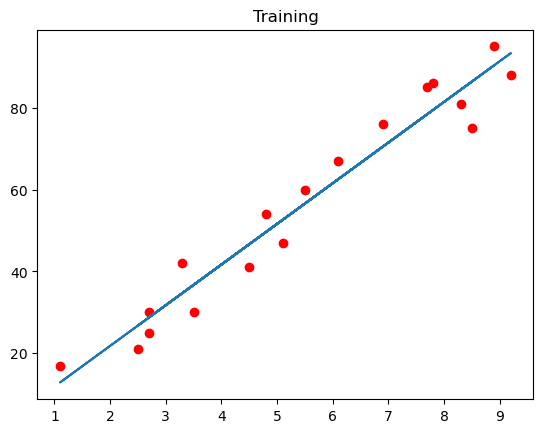

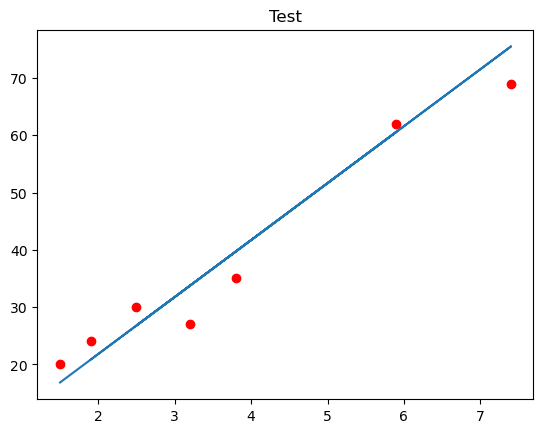

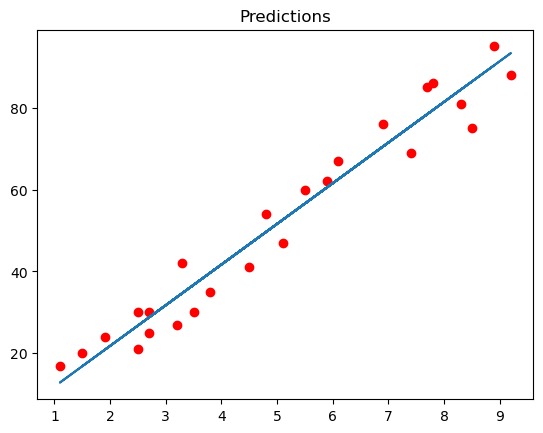

In [12]:
#your code here
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('score.csv')

X = np.array(df['Hours'])
y = np.array(df['Scores'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X = X.reshape(-1, 1)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
lr = LinearRegression().fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")
lr.predict([[5], [15], [35]])

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lr.predict(X_train))
plt.title('Training')
plt.show()

plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, lr.predict(X_test))
plt.title('Test')
plt.show()

plt.scatter(X, y, color='red')
plt.plot(X, lr.predict(X))
plt.title('Predictions')
plt.show()

In [14]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

ridge = Ridge(alpha=0.6).fit(X_train, y_train)

print("L2 regularization (Ridge)")
print(f"Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge.score(X_test, y_test):.2f}\n")

lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print("L1 regularization (Lasso)")
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}\n")

elastic_net = ElasticNet(alpha=0.03, l1_ratio=0.03).fit(X_train, y_train)

print("Elastic Net")
print(f"Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Test set score: {elastic_net.score(X_test, y_test):.2f}")

L2 regularization (Ridge)
Training set score: 0.95
Test set score: 0.94

L1 regularization (Lasso)
Training set score: 0.95
Test set score: 0.94

Elastic Net
Training set score: 0.95
Test set score: 0.94
